# INFO 2950 Phase 2: Data Exploration

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Instagram Statistics
TODO explain what we're hoping to find

In [2]:
instagram_dir = "instagram" # instagram dataset
instagram_files = os.listdir(instagram_dir)

instagram_files[:10]

['amherstcollege.csv',
 'arizonastateuniversity.csv',
 'bostoncollege.csv',
 'bostonu.csv',
 'bowdoincollege.csv',
 'brownu.csv',
 'caltechedu.csv',
 'carletoncollege.csv',
 'carnegiemellon.csv',
 'claremontmckennacollege.csv']

In [8]:
instagram_df = {}
for file in instagram_files:
    df = pd.read_csv(os.path.join(instagram_dir, file))
    df.date = pd.to_datetime(df.date)
    instagram_df[file.split(".")[0]] = df

instagram_df["cornelluniversity"].dtypes

date         datetime64[ns]
followers           float64
following             int64
posts                 int64
dtype: object

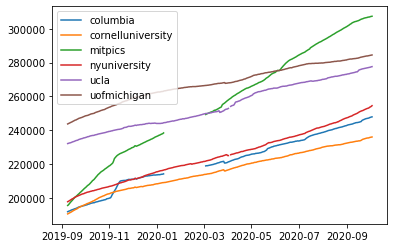

In [9]:
follower_slopes = []

for (name, df) in instagram_df.items():
    date = df.date
    followers = df.followers
    
    follower_mean = followers.mean()
    if (follower_mean > 200000 and follower_mean < 300000):
        plt.plot(date, followers, label=name)

plt.legend()
plt.show()

,name,percent_increase
0,johnshopkinsu,115.458937
1,ivyleague,89.973615
2,csupueblo,67.266592
3,mitpics,57.237852
4,claremontmckennacollege,47.784810


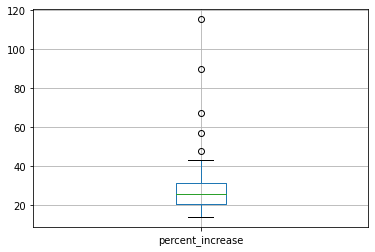

In [10]:
college_names = []
follower_percent_increases = []

for (name, df) in instagram_df.items():
    followers = df.followers
    
    follower_percent_increase = (followers.max() - followers.min()) / followers.min() * 100
    
    college_names.append(name)
    follower_percent_increases.append(follower_percent_increase)

follower_increase = pd.DataFrame(data={"name": college_names, "percent_increase": follower_percent_increases})
follower_increase = follower_increase.sort_values(by=["percent_increase"], ascending=False).reset_index(drop=True)
follower_increase.boxplot()
follower_increase.head()

In [11]:
instagram_df["johnshopkinsu"]

,date,followers,following,posts
0,2019-09-08 15:42:40.984521,62100.0,435.0,603
1,2019-09-09 12:00:19.072506,62200.0,435.0,603
2,2019-09-10 12:00:11.641788,62300.0,436.0,604
3,2019-09-11 12:00:11.432705,62500.0,436.0,604
4,2019-09-12 12:00:12.890873,62700.0,436.0,605
...,...,...,...,...
381,2020-09-28 12:00:21.117384,133400.0,471.0,788
382,2020-09-29 12:00:29.433536,133500.0,473.0,788
383,2020-09-30 12:00:33.426631,133600.0,474.0,788
384,2020-10-01 12:00:19.580178,133700.0,473.0,788


### College/University Information
TODO explain what we're hoping to find